# **TASK 1:** Unsupervised Learning 
---
*   **Objectives:** To use unsupervised learning techniques to make a preliminary exploration of the data and to extract conclusions.
*   **Authors:** Alejandro Ruiz Aranda & Luis Santiyán García
*   **Repository:** https://github.com/luissanty2/MachineLearningTechniquesAL








## 1. Load/Download the source Data

As we are a group of two people, we download "winequality-red.csv".

In [1]:
!wget https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv

--2021-11-02 20:14:06--  https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.005s  

2021-11-02 20:14:06 (17.1 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



## 2. Transform data on a DataFrame

First, for having a clean and a better understandable code, we are going to put every import here.

In [45]:
# pandas for reading file and using its dataframe 
import pandas as pd
# seaborn for the heatmap
import seaborn as sb
# plotly for plots
import plotly.express as px
# matplotlib for more plots
import matplotlib.pyplot as plt
# numpy for many operations
import numpy as np
# sklearn.neighbors for calculating euclidean distance for HAC and DBSCAN and using kneighbors_graph in DBSCAN
import sklearn.neighbors as sn
# cluster.hierarchy for dendrogram and HAC
import scipy.cluster.hierarchy as ch
# preprocessing from sklearn for normalizing
from sklearn import preprocessing
# PCA from sklearn.descomposition for dimensionality reduction
from sklearn.decomposition import PCA
# KMeans and DBSCAN for algorithms
from sklearn.cluster import KMeans, DBSCAN
# metrics for silhouettes of kmeans
from sklearn import metrics
# tabulate for creating a table
from tabulate import tabulate
# stats to detect outliers
from scipy import stats

Now, the file is read and transformed into a pandas dataframe


In [3]:
df = pd.read_csv("winequality-red.csv", sep =";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Preprocessing




As the assignement says, "quality" is eliminated for building the models. Still, we are going to save it and scale it for using it in conclusions.

In [4]:
df_cut = df.drop(['quality'], axis=1)
df_cut.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Now we check if there are any null values.

In [5]:
check_for_nan = df_cut.isnull().values.any()
print (check_for_nan)

False


As there is no null values, we can proceed to normalizing the data to have a mean of 0 and standard deviation of 1. 
For this purpose, we use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) from scikitlearn.

In [6]:
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df_cut)

quality_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## 4. DIMENSIONALITY REDUCTION


First, we perform a correlation matrix to observe the relationships between the features.

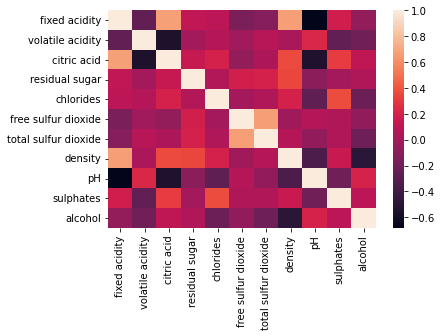

In [7]:
mtx_corr = df_cut.corr()
# plot the heatmap and annotation on it
sb.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

For dimensionality reduction we use PCA technique to obtain all principal components.

In [8]:
pca = PCA(n_components=7)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)
print("original shape:   ", df_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 11)
transformed shape: (1599, 7)


Then, we show the percentage of variance explained by each of the components.

In [11]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.line(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [12]:
#@title Number of components {run: "auto"}
n_components = 7 #@param { type: "slider", min: 1, max: 17, step: 1}

As can be seen in the graph above, to make a good projection close to 90% we will need about 7 components:

In [13]:
X_pca = PCA (n_components = n_components ).fit_transform(df_scaled)
X_pca

array([[-0.27183851, -0.19512531, -0.19035069, ...,  0.05555013,
        -0.0571423 , -0.04975935],
       [-0.22584757, -0.25861705,  0.01749353, ..., -0.07964498,
         0.18844111, -0.0264863 ],
       [-0.18726035, -0.17995514, -0.0925093 , ..., -0.03861896,
         0.10681494, -0.013658  ],
       ...,
       [-0.24677055,  0.04661644,  0.16335355, ...,  0.06278137,
         0.01480934, -0.09374236],
       [-0.33806992, -0.06540783,  0.16368127, ...,  0.08739353,
        -0.02038447, -0.05304386],
       [ 0.0045836 ,  0.19845025,  0.15856628, ...,  0.09939332,
        -0.14112418,  0.12112711]])

In [14]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])
fig.show()

## 5. Clustering

- k-means

- HAC
- DBSCAN



### 5.1. K-means:







For k-means, we must set parameters first.

In [15]:
# initialization method 
init = 'random' 

# run 10 times with different random centroids to choose the final model as the one with the lowest SSE
iterations = 10 #@param {type:"slider", min:1, max:40, step:1}

# maximum number of iterations for each single run
max_iter = 300 #@param {type:"slider", min:50, max:1000, step:25}

# tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence
tol = 1e-04 

# random
random_state = 0

# clusters
k_clusters = 20 #@param {type:"slider", min:1, max:100, step:1}

Now, two lists for distortions and silhouettes are initialized and the algorithm is executed.

In [16]:
distortions = []
silhouettes = []

for i in range(2, k_clusters + 1):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    k_labels = km.fit_predict(df_scaled)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(df_scaled, k_labels))

Finally, the result of k-means is shown.


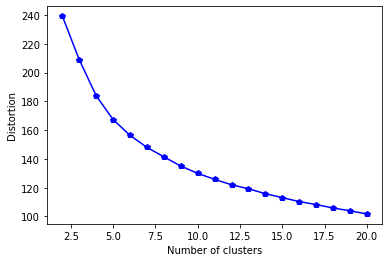

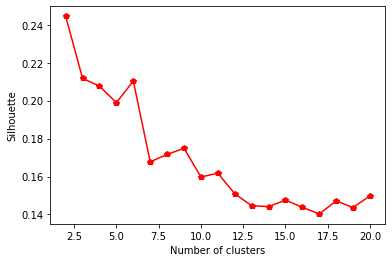

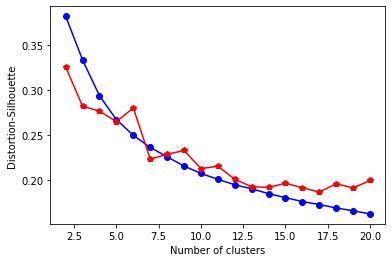

In [18]:
plt.plot(range(2,k_clusters + 1), distortions , marker='p', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

plt.plot(range(2,k_clusters + 1), silhouettes , marker='p', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

plt.plot(range(2,k_clusters + 1), distortions/np.linalg.norm(distortions), marker='o', color='blue')
plt.plot(range(2,k_clusters + 1), silhouettes/np.linalg.norm(silhouettes) , marker='p', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion-Silhouette')

plt.show()

And finally, we also represent it using an scatter map.


In [19]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = k_labels)
fig.show()

### 5.2. Hierarchichal clustering.

We first calculate similarity matrix and show it using a heatmap

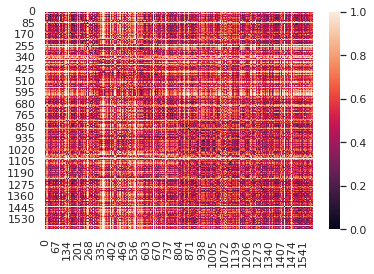

In [20]:
dist = sn.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(df_scaled)

# visualization
sb.set()
ax = sb.heatmap(matsim,vmin=0, vmax=1)

Here it is calculated the clusters for the algorithm. We have a slider for the cut used in HAC, for 30 generates 20 groups.

In [21]:
#@title Scalation {run: "auto"}
cut = 30 #@param {type:"slider", min:1, max:100, step:1}

clusters = ch.linkage(matsim, method = 'ward')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



Now we print dendrogram.

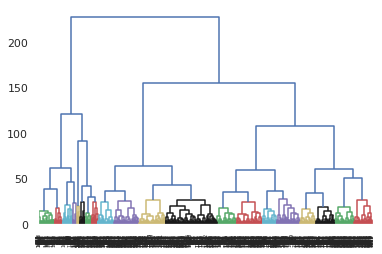

In [22]:
ch.dendrogram(clusters, color_threshold=cut)
plt.show()

Then we execute HAC.




In [24]:
hac_labels = ch.fcluster(clusters, cut , criterion='distance')
print("Number of groups:",max(hac_labels))

Number of groups: 20


Finally we can plot the 2 first columns of PCA with the colors generated on HAC in a scatter map, for representing the result.

In [25]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = hac_labels)
fig.show()

### 5.3. DBSCAN

* First we draw in a chart the shortest distance to the neighbor to obtain the epsilon to use in DBSCAN.
As MintPts we put a low number, considering that having 3 similar states is already synonymous with a dense area. 
So lets compute a similiarity/distance  matrix:

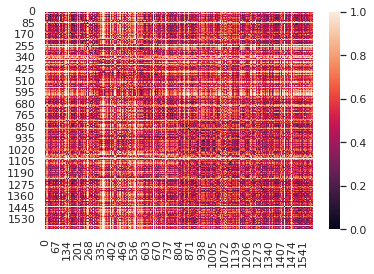

In [26]:
dist = sn.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(df_scaled)

# visualization
sb.set()
ax = sb.heatmap(matsim,vmin=0, vmax=1)

* Compute the distance from each point to its neighbors (3):

In [28]:
minPts=3 #@param {type:"slider", min:1, max:100, step:1}

A = sn.kneighbors_graph(df_scaled, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(df_scaled):
    for j in range(len(df_scaled)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()

In [29]:
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

* Next we will try different clusters from 0.30 to 0.8 with intervals of 0.1. However, the arrangement of the data will cause DBSCAN to isolate only a dense zone of those elements it considers outliers:

In [30]:
results = []
for eps in np.arange(0.30, 0.90, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(df_scaled)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

# print results
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
  0.3           5          50
  0.4           3          16
  0.5           2           6
  0.6           1           4
  0.7           1           1
  0.8           1           0
  0.9           1           0


* As we can see DBSCAN groups the elements in a group and the rest are outliers. The number of outliers is significant to take into account, so we are going to keep the settings that offer a balanced number between outliers and groups.

In [37]:
eps = 0.2 #@param {type:"slider", min:0.1, max:1, step:1}

db = DBSCAN(eps, min_samples=minPts).fit(df_scaled)
db_labels = db.labels_

And finally we represent DBSCAN using an scatter map.

In [38]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = db_labels)
fig.show()

## 6. Analysis/Interpretation of the Results

In [39]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color=k_labels, title="K-means")
fig.show()

fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color=hac_labels, title="HAC")
fig.show()

fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color=db_labels, title="DBSCAN")
fig.show()

After comparing the results in all 3 clustering algorithms, we decided that the best one for our goals and dataset is HAC because it looks like it made the best agrupations. Also, it is way faster than k-means.

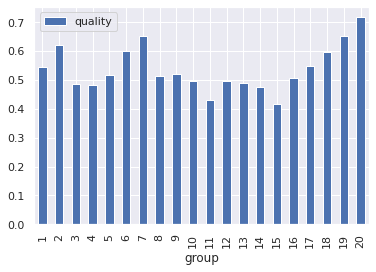

In [41]:
df_hac = quality_scaled
df_hac['group'] = hac_labels

res = df_hac[['quality','group']].groupby(('group')).mean()
res.plot(kind='bar', legend=True)

With this, we can see that the group that has the highest quality level is group 20, and now we can work with it. We also are going to take the one with the least quality(11) and we are going to find a correlation between quality and other features.

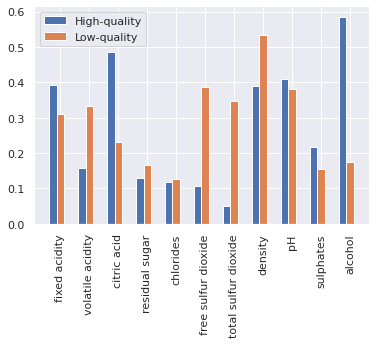

In [42]:
df_max = df_hac[df_hac['group'] == 20].drop(['group','quality'], axis=1)
df_min = df_hac[df_hac['group'] == 15].drop(['group','quality'], axis=1)

arr_max = df_max.mean().array
arr_min = df_min.mean().array

width = 0.25

r1 = np.arange(len(arr_max))
r2 = [x + width for x in r1]

plt.bar(r1, arr_max, width=width)
plt.bar(r2, arr_min, width=width)
plt.xticks([r + width for r in range(len(arr_max))], df.columns, rotation=90)
plt.legend(['High-quality','Low-quality'])

plt.show()

We made a comparison between the highest and the lowest quality groups. We compared the mean of each feature in a plot bar. As can be seen in the graph these are the results:


1.   Fixed acidity is slighly higher in high-quality wines that in low-quality ones.
2.   Citric acid and alcohol are heavily higher in high-quality wines that in low-quality ones.
3.   Density, pH are slighly higher in low-quality wines that in high-quality ones.
4.   Volatile acidity is heavily higher in low-quality wines that in low-quality ones.
5.   Free sulfur dioxide and total sulfur dioxide are heavily higher in high-quality wines.
6.   It apparently seems like there is no significant differences between the other features.

In conclusion according to our analysis a high-quality wine has a  high quality wine has high values in the following features:
*   alcohol
*   citric acid
On the other hand, a wine with too much density or volatile acidity it is not usually a wine of high quality and a wine with high free and total sulfur dioxide it is almost always a low-quality wine.




# OPTIONAL: OUTLIERS DETECTION

First, instantiate the model with the parameters you selected and then fit the model to your data. 
The key parameter in kNN is n_neighbors, which determines the number of neighbors to use for calculating distances from the point of measurement.

In [75]:
X_out = df_cut.values

# instantiate model
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X_out)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

Now  it’s time to extract model outputs distances between data points and associated index values — that can be used for detecting anomalies.

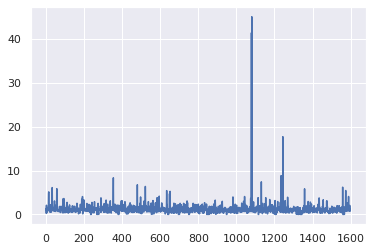

In [77]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X_out)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

As we can see, there are some spikes in distance measures, and these spikes are potentially anomalies or outliers in the dataset

In [78]:
# visually determine cutoff values > 6.5
outlier_index = np.where(distances.mean(axis = 1) > 6.5)
outlier_index

(array([ 354,  480, 1079, 1081, 1131, 1235, 1244]),)

In this time we choose 6.5 as the cutoff to get the outliers.

In [82]:
# filter outlier values
outlier_values = df_cut.iloc[outlier_index]
outlier_values


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
480,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2
1079,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3
1081,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3
1131,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5
1235,6.0,0.33,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5
1244,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3


Finally we filter the outliers from the dataset.